In [1]:
!pip install wordcloud

In [2]:
# Importing requests to extract content from a url
import requests   
# Beautifulsoup is for web scrapping...used to scrap specific content 
from bs4 import BeautifulSoup as bs 
import re 
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from textblob import TextBlob 
from wordcloud import WordCloud
import pandas as pd


In [3]:
#!pip install textblob

In [4]:
def get_sentiment(review): 
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(review)
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [5]:
a = 'This was  a disgrace on the screen.  An utter waste of time.'

get_sentiment(a)

'negative'

# Vader Lexicon

In [6]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [8]:
sia = SentimentIntensityAnalyzer()
a = 'This was not a disgrace on the screen.  Not An utter waste of time.'
sia.polarity_scores(a)


{'neg': 0.0, 'neu': 0.689, 'pos': 0.311, 'compound': 0.6072}

In [9]:
def get_vader_sentiment(review): 
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
    sia = SentimentIntensityAnalyzer()
    # create TextBlob object of passed tweet text 
    analysis = sia.polarity_scores(review)
    # set sentiment 
    if analysis["compound"] > 0: 
        return 'positive'
    elif analysis["compound"] < 0: 
        return 'negative'
    else: 
        return 'neutral'

In [10]:
# creating empty reviews list 
movie_reviews=[]
#forest = ["the","king","of","jungle"]


ip=[]  
url="http://www.imdb.com/title/tt3521164/reviews?ref_=tt_urv"
#url="https://www.amazon.in/Apple-MacBook-Air-13-3-inch-Integrated/product-reviews/B073Q5R6VR/ref=cm_cr_arp_d_paging_btm_2?showViewpoints=1&pageNumber="+str(i)
#url = "https://www.amazon.in/All-New-Kindle-reader-Glare-Free-Touchscreen/product-reviews/B0186FF45G/ref=cm_cr_getr_d_paging_btm_3?showViewpoints=1&pageNumber="
response = requests.get(url)
print(response.status_code)
# create soup object to iterate over the extracted content 
soup = bs(response.content,"html.parser")


#print(soup)
# Extracting the content under specific tags  
reviews = soup.findAll("span",attrs={"class","a-size-base review-text-content"})
reviews = soup.findAll("div", attrs={"class","text"})
#for i in range(len(reviews)):
 # empty dictionary to store required params 
rev = [] 


for i in range(1,4):
    parsed_rev = {} 
    parsed_rev['rev_id'] = i
    #parsed_rev['blob_sentiment'] = get_vader_sentiment(reviews[i].text)
    parsed_rev['vader_sentiment'] = get_vader_sentiment(reviews[i].text)
    ip.append(reviews[i].text)  
    rev.append(parsed_rev)
    
# adding the reviews of one page to empty list which in future contains all the reviews
movie_reviews=movie_reviews+ip  
rev

200


[{'rev_id': 1, 'vader_sentiment': 'positive'},
 {'rev_id': 2, 'vader_sentiment': 'positive'},
 {'rev_id': 3, 'vader_sentiment': 'positive'}]

In [11]:
reviews[2].text, rev[2]

("Why this movie has 7.6? Y'all crazy, this is a great movie, with amazing music. Yes is not perfect portrayal of polynesian culture and that's usually never the point with Disney movies.",
 {'rev_id': 3, 'vader_sentiment': 'positive'})

# Rule based approach

In [12]:
# Reading reviews from a text file 
with open("Elon_musk.csv","r",encoding='utf8') as input:
    Elon_reviews = input.read()
type(Elon_reviews)   

str

In [13]:
# Joinining all the reviews into single paragraph 
#ip_rev_string = " ".join(iphone_reviews)
Elon_rev_string = Elon_reviews
# Removing unwanted symbols incase if exists
#ip_rev_string = re.sub("[^A-Za-z" "]+"," ",ip_rev_string).lower()
Elon_rev_string = re.sub("[0-9" "]+"," ",Elon_rev_string)


# words that contained in iphone 7 reviews
Elon_reviews_words = Elon_rev_string.split(" ")

stop_words = stopwords.words('english')
#stopwords = stop_words.split("\n")
Elon_reviews_words = [w for w in Elon_reviews_words if not w in stop_words]

# Joinining all the reviews into single paragraph 
Elon_rev_string = " ".join(Elon_reviews_words)

In [14]:
## Example
Elon_rev_string

'Text\n ,@kunalb  I’m alien\n ,@ID_AA_Carmack Ray tracing Cyberpunk HDR next-level. Have tried it?\n ,@joerogan @Spotify Great interview!\n ,@gtera  Doge underestimated\n ,@teslacn Congratulations Tesla China amazing execution last year. Now next even more!!\n ,Happy New Year Ox! https://t.co/ WFKMYu oj\n ,"Frodo underdoge,\nAll thought would fail,\nHimself all. https://t.co/zGxJFDzzrM"\n ,@OwenSparks_ @flcnhvy @anonyx  Haha thanks :)\n ,@flcnhvy @anonyx  Indeed! Tweets definitely represent real-world time allocation.\n ,The entertaining outcome likely\n ,@GiveDirectly Just sent some\n ,Just agree Clubhouse @kanyewest\n ,https://t.co/ rWE uHSTS\n ,@geoffkeighley @UnrealEngine It’s getting real\n ,"Bought Dogecoin lil X, toddler hodler"\n ,"@JoshManMode He definitely issues, sentencing seems bit high"\n ,@freewalletorg Thanks fixing\n ,@freewalletorg Please unlock account\n ,@AstroJordy <U+ F ><U+ F >\n ,This true power haha https://t.co/Fc uhQSd O\n ,@freewalletorg Any crypto wallet wo

In [15]:
#temp = ["this","is","awsome","Data","Science"]
#[i for i in temp if i not in "is"]

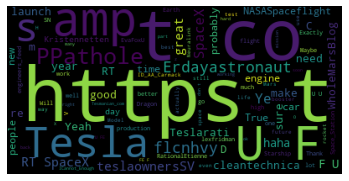

In [16]:
# WordCloud can be performed on the string inputs. That is the reason we have combined 
# entire reviews into single paragraph
# Simple word cloud


wordcloud_Elon = WordCloud(
                      background_color='black',
                      max_words = 100
                     ).generate(Elon_rev_string)

plt.imshow(wordcloud_Elon)
plt.axis("off")
plt.show()

In [17]:
# positive words # Choose the path for +ve words stored in system
with open("positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")
  
poswords = poswords[36:]


# negative words  Choose path for -ve words stored in system
with open("negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

negwords = negwords[37:]


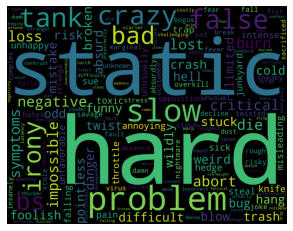

In [18]:
# negative word cloud
# Choosing the only words which are present in negwords
Elon_neg_in_neg = " ".join ([w for w in Elon_reviews_words if w in negwords])

wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(Elon_neg_in_neg)

plt.imshow(wordcloud_neg_in_neg)
plt.axis("off")

plt.show()

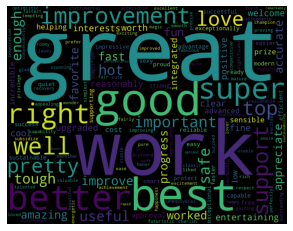

In [19]:
# Positive word cloud
# Choosing the only words which are present in positive words
Elon_pos_in_pos = " ".join ([w for w in Elon_reviews_words if w in poswords])
wordcloud_pos_in_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(Elon_pos_in_pos)
plt.imshow(wordcloud_pos_in_pos)
plt.axis("off")
plt.show()

In [20]:
len(Elon_pos_in_pos)

4074

In [21]:
len(Elon_neg_in_neg)

2570

In [22]:
len(Elon_reviews_words)

18291

In [23]:
4074/18291

0.2227324913892078

In [24]:
2570/18231

0.14096867972135374

# Amazon reviews

In [25]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [26]:
import numpy as np
import pandas as pd

df = pd.read_csv('Elon_musk.csv', sep='\t')
df.head()

,Text
0,"1,@kunalb11 I’m an alien"
1,"2,@ID_AA_Carmack Ray tracing on Cyberpunk with..."
2,"3,@joerogan @Spotify Great interview!"
3,"4,@gtera27 Doge is underestimated"
4,"5,@teslacn Congratulations Tesla China for ama..."


In [27]:
df['Text'].value_counts()

615,"@IsaacLatterell @TashaARK @karpathy Andrej is awesome, but it should be said that we have a very talented Autopilot… https://t.co/64ocngk3ey"    1
977,@PlayOverwatch Sweet …                                                                                                                            1
437,@pcgamer Great game                                                                                                                               1
125,@flcnhvy Only Halo                                                                                                                                1
1660,@Erdayastronaut I’m in the Boca control room. Hop attempt in ~33 minutes.                                                                        1
                                                                                                                                                     ..
1837,Impressive Tianwen-1 Mars rover mission launched by China today https://t.co/FsyA3I

In [28]:
sid.polarity_scores(df.loc[0]['Text'])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [29]:
df['scores'] = df['Text'].apply(lambda review: sid.polarity_scores(review))
df.head()

,Text,scores
0,"1,@kunalb11 I’m an alien","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,"2,@ID_AA_Carmack Ray tracing on Cyberpunk with...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,"3,@joerogan @Spotify Great interview!","{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'comp..."
3,"4,@gtera27 Doge is underestimated","{'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'comp..."
4,"5,@teslacn Congratulations Tesla China for ama...","{'neg': 0.0, 'neu': 0.644, 'pos': 0.356, 'comp..."


In [30]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,Text,scores,compound
0,"1,@kunalb11 I’m an alien","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,"2,@ID_AA_Carmack Ray tracing on Cyberpunk with...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,"3,@joerogan @Spotify Great interview!","{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'comp...",0.6588
3,"4,@gtera27 Doge is underestimated","{'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'comp...",-0.2732
4,"5,@teslacn Congratulations Tesla China for ama...","{'neg': 0.0, 'neu': 0.644, 'pos': 0.356, 'comp...",0.8513


In [31]:
df['scores'][0]['compound']

0.0

In [32]:
df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

In [33]:
df.head(10)

,Text,scores,compound,comp_score
0,"1,@kunalb11 I’m an alien","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
1,"2,@ID_AA_Carmack Ray tracing on Cyberpunk with...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
2,"3,@joerogan @Spotify Great interview!","{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'comp...",0.6588,pos
3,"4,@gtera27 Doge is underestimated","{'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'comp...",-0.2732,neg
4,"5,@teslacn Congratulations Tesla China for ama...","{'neg': 0.0, 'neu': 0.644, 'pos': 0.356, 'comp...",0.8513,pos
5,"6,Happy New Year of the Ox! https://t.co/9WFKM...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
6,"7,""Frodo was the underdoge,","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
7,"All thought he would fail,","{'neg': 0.467, 'neu': 0.533, 'pos': 0.0, 'comp...",-0.5423,neg
8,"Himself most of all. https://t.co/zGxJFDzzrM""","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
9,"8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)","{'neg': 0.0, 'neu': 0.252, 'pos': 0.748, 'comp...",0.8360,pos


In [34]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [35]:
accuracy_score(df['Text'],df['comp_score'])

0.0

In [36]:
print(classification_report(df['Text'],df['comp_score']))

                                                                                                                                                                        precision    recall  f1-score   support

                                                                                                                                            - Alien message decrypted"       0.00      0.00      0.00       1.0
                                                        - Tesla already uses iron-phosphate for medium range cars made in our Shanghai facto… https://t.co/MIlWSilvRT"       0.00      0.00      0.00       1.0
                                                                                                                                              1,@kunalb11 I’m an alien       0.00      0.00      0.00       1.0
                                                                                                                                                      1. You can’t win 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.

In [37]:
print(confusion_matrix(df['Text'],df['comp_score']))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Named Entity Recognition

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as  plt
%matplotlib inline
from wordcloud import WordCloud

In [ ]:
import pandas
Elon=pd.read_csv("Elon_musk.csv",error_bad_lines=False)

In [ ]:
Elon = [x.strip() for x in Elon.Text] # remove both the leading and the trailing characters
Elon = [x for x in Elon if x] # removes empty strings, because they are considered in Python as False
Elon[0:10]

In [ ]:
##Part Of Speech Tagging

nlp = spacy.load("en_core_web_sm")

one_block = Elon[2]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [ ]:
one_block

In [ ]:
for token in doc_block[0:20]:
    print(token, token.pos_)

In [ ]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[0:250])

In [ ]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:100]

In [ ]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:100].plot.bar(x='word', figsize=(6,8), title='Top verbs and nouns')

# Emotion Mining

In [ ]:
#Sentiment analysis

Elon = pd.read_csv('Elon_musk.csv', sep=',', encoding='latin-1')
Elon.shape

In [ ]:
Elon.head(10)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

import pandas
Elon=pd.read_csv("Elon_musk.csv",error_bad_lines=False)
Elon = [x.strip() for x in Elon.Text] # remove both the leading and the trailing characters
Elon = [x for x in Elon if x] # removes empty strings, because they are considered in Python as False

In [ ]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(Elon))
sentences[0:150]

In [ ]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

In [ ]:
df.set_index('Text').to_dict()

In [ ]:
affinity_scores = Elon.set_index('Text').to_dict()

In [ ]:
affinity_scores = Elon.set_index('word')['value'].to_dict()

In [ ]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load("en_core_web_sm")

sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [ ]:
# test that it works
calculate_sentiment(text = 'amazing')

In [ ]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [ ]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

In [ ]:
sent_df.sort_values(by='sentiment_value').tail(10)

In [ ]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

In [ ]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

In [ ]:
sent_df[sent_df['sentiment_value']>=20].head()

In [ ]:
sent_df['index']=range(0,len(sent_df))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

In [ ]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')